In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\2301010007_B.Tech cse_2_Gold Price Tracker\gld_price_data.csv")

In [5]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Dataset Preprocessing

## Missing Values

In [9]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Convert Date to integer in the format YYYYMMDD
data['DateInt'] = data['Date'].dt.strftime('%Y%m%d').astype(int)

print(data)

           Date          SPX         GLD        USO      SLV   EUR/USD  \
0    2008-01-02  1447.160034   84.860001  78.470001  15.1800  1.471692   
1    2008-01-03  1447.160034   85.570000  78.370003  15.2850  1.474491   
2    2008-01-04  1411.630005   85.129997  77.309998  15.1670  1.475492   
3    2008-01-07  1416.180054   84.769997  75.500000  15.0530  1.468299   
4    2008-01-08  1390.189941   86.779999  76.059998  15.5900  1.557099   
...         ...          ...         ...        ...      ...       ...   
2285 2018-05-08  2671.919922  124.589996  14.060000  15.5100  1.186789   
2286 2018-05-09  2697.790039  124.330002  14.370000  15.5300  1.184722   
2287 2018-05-10  2723.070068  125.180000  14.410000  15.7400  1.191753   
2288 2018-05-14  2730.129883  124.489998  14.380000  15.5600  1.193118   
2289 2018-05-16  2725.780029  122.543800  14.405800  15.4542  1.182033   

       DateInt  
0     20080102  
1     20080103  
2     20080104  
3     20080107  
4     20080108  
...      

In [47]:
print(data.dtypes)

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
DateInt             int32
dtype: object


In [80]:
X = data.iloc[:,[2,3,4,5,6]]
y = data.iloc[:,1]

In [51]:
X

,GLD,USO,SLV,EUR/USD,DateInt
0,84.860001,78.470001,15.1800,1.471692,20080102
1,85.570000,78.370003,15.2850,1.474491,20080103
2,85.129997,77.309998,15.1670,1.475492,20080104
3,84.769997,75.500000,15.0530,1.468299,20080107
4,86.779999,76.059998,15.5900,1.557099,20080108
...,...,...,...,...,...
2285,124.589996,14.060000,15.5100,1.186789,20180508
2286,124.330002,14.370000,15.5300,1.184722,20180509
2287,125.180000,14.410000,15.7400,1.191753,20180510
2288,124.489998,14.380000,15.5600,1.193118,20180514


In [82]:
y

0       1447.160034
1       1447.160034
2       1411.630005
3       1416.180054
4       1390.189941
           ...     
2285    2671.919922
2286    2697.790039
2287    2723.070068
2288    2730.129883
2289    2725.780029
Name: SPX, Length: 2290, dtype: float64

In [84]:
X.shape

(2290, 5)

In [86]:
y.shape

(2290,)

### Histogram Density Plot

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

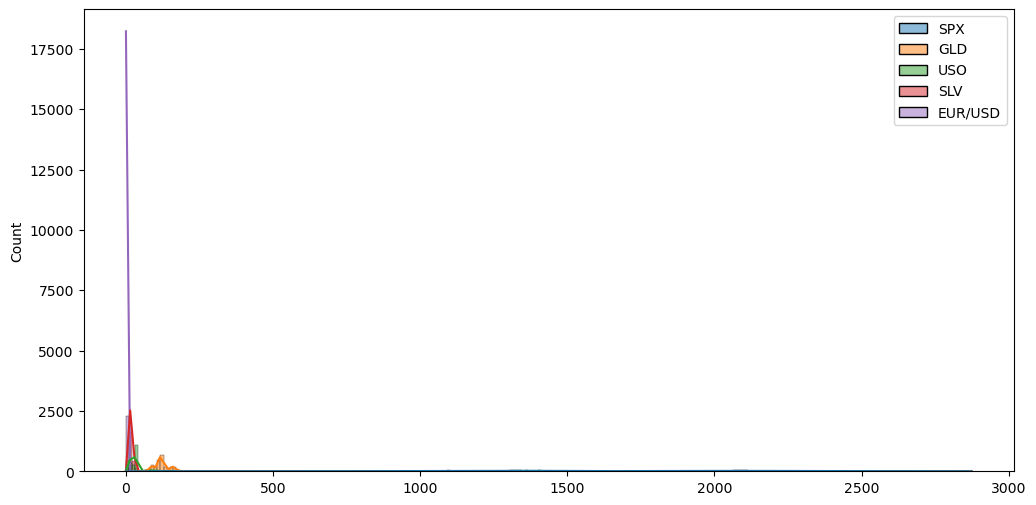

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data, kde=True)

## Correlaton Plot

Text(0.5, 1.0, 'Pearson Correlation Matrix')

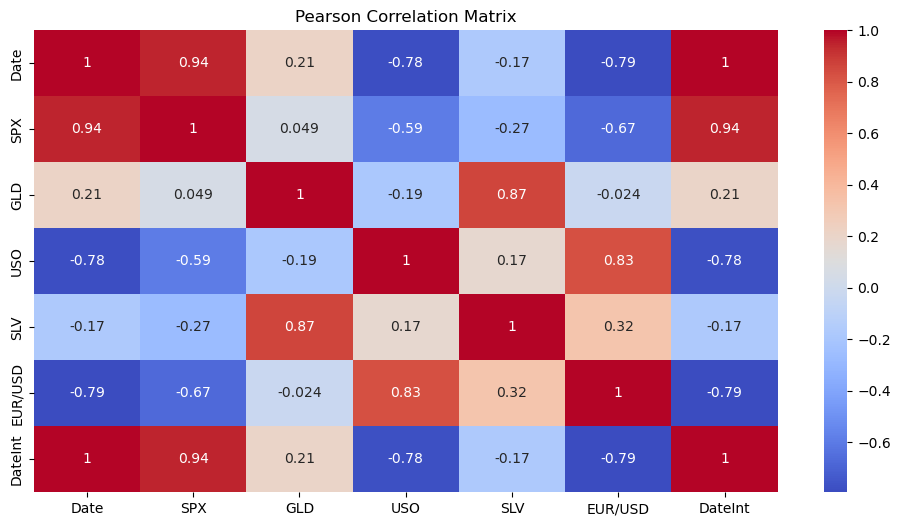

In [39]:
plt.figure(figsize=(12,6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap= "coolwarm")
plt.title("Pearson Correlation Matrix")

## Outliers Box plot

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SPX'),
  Text(1, 0, 'GLD'),
  Text(2, 0, 'USO'),
  Text(3, 0, 'SLV'),
  Text(4, 0, 'EUR/USD'),
  Text(5, 0, 'DateInt')])

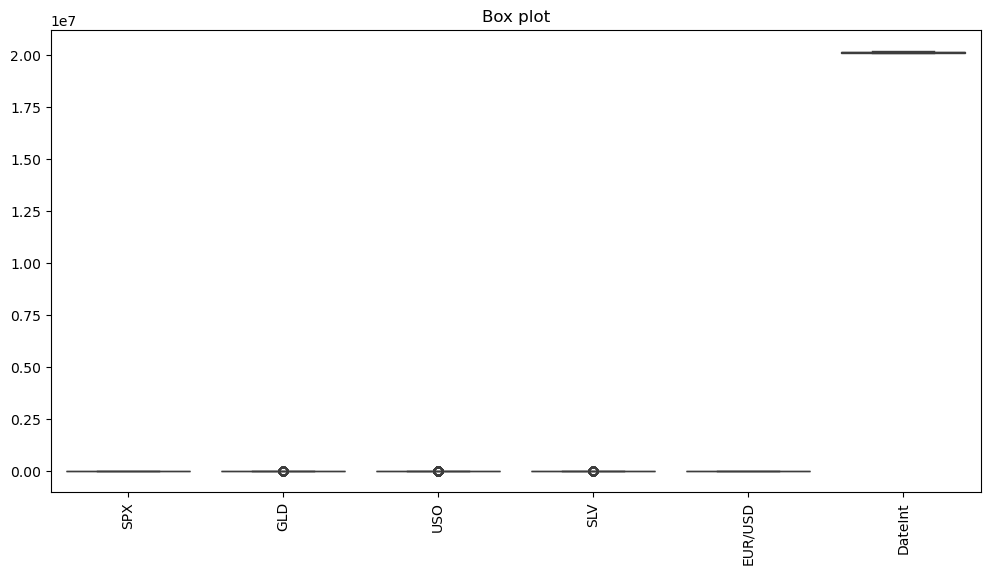

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Box plot")
plt.xticks(rotation=90)

### Oultliers handling using Z-score method

In [88]:
for column in data.columns:
    median = data[column].median()
    std =  data[column].std()
    outliers = (data[column]-median).abs()>3*std
    data.loc[outliers, column] = median

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SPX'),
  Text(1, 0, 'GLD'),
  Text(2, 0, 'USO'),
  Text(3, 0, 'SLV'),
  Text(4, 0, 'EUR/USD'),
  Text(5, 0, 'DateInt')])

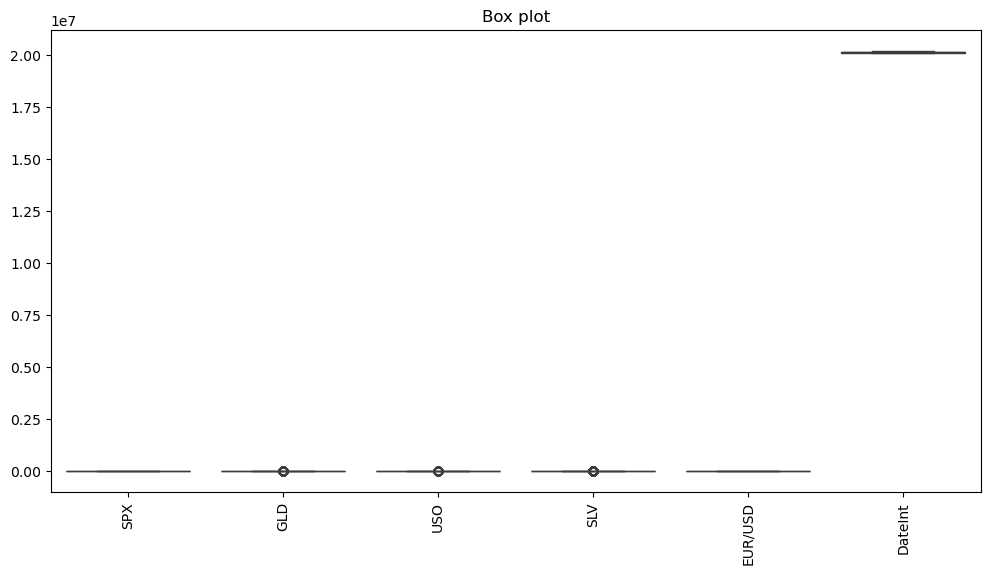

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Box plot")
plt.xticks(rotation=90)

In [90]:
from sklearn.model_selection import train_test_split

In [92]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Regression Model

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [97]:
model = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      n_jobs=-1)
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross validation MSE: {-cv_score}")
print()
print(f"Cross validation MSE: {-cv_score.mean():.2f}")

Cross validation MSE: [581.53476633 962.18433702 702.10170217 502.25093367 585.93584524]

Cross validation MSE: 666.80


In [100]:
from sklearn.model_selection import learning_curve


In [102]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = np.mean(-train_scores, axis=1)
test_mse = np.mean(-test_scores, axis=1)

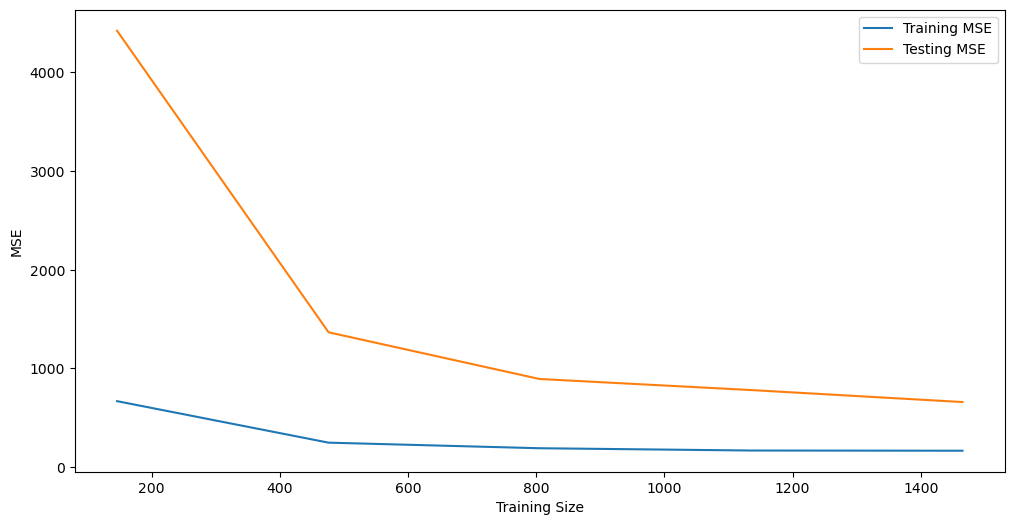

In [103]:
plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mse, label="Training MSE")
plt.plot(train_sizes, test_mse, label="Testing MSE")
plt.xlabel("Training Size")
plt.ylabel("MSE")
plt.legend()

## Hyperparameter Tuning

### GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {"n_estimators":[100,300,500,600], "max_features": ['sqrt', 'log2', 'auto'], "max_depth": [None, 5, 10, 20]}

In [112]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [114]:
grid_search.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\skle

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             n_estimators=500, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [100, 300, 500, 600]},
             scoring='neg_mean_squared_error')

In [116]:
best_params = grid_search.best_estimator_

In [118]:
best_params

RandomForestRegressor(max_features='log2', n_estimators=600, n_jobs=-1)

In [120]:
param_grid = {"n_estimators":[100,300,500,600], "max_features": ['sqrt', 'log2', 'auto'], "max_depth": [None, 5, 10, 20]}

In [122]:
grid_search.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 600}

In [124]:
data_1 = grid_search.cv_results_["mean_test_score"]

In [126]:
data_1.shape

(48,)

Text(0.5, 0, 'Iterations')

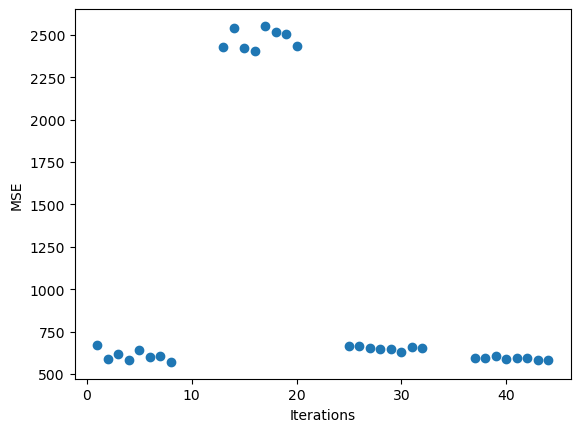

In [128]:
plt.scatter(np.arange(1,49),data_1*-1)
plt.ylabel("MSE")
plt.xlabel("Iterations")

In [130]:
grid_search.cv_results_

{'mean_fit_time': array([9.77235174e-01, 3.09648886e+00, 5.64792943e+00, 6.79752183e+00,
        1.69872766e+00, 3.22547913e+00, 4.66813526e+00, 6.25652890e+00,
        3.45411301e-03, 6.25128746e-03, 1.13637447e-02, 1.65428638e-02,
        1.36756659e+00, 2.48333964e+00, 3.02769451e+00, 4.61206446e+00,
        8.27023697e-01, 2.50697937e+00, 3.89627104e+00, 6.10336394e+00,
        1.17399216e-02, 3.45263481e-03, 1.27515793e-02, 1.10401154e-02,
        1.37466917e+00, 3.18061972e+00, 5.10023537e+00, 7.28636398e+00,
        1.56700125e+00, 4.19145098e+00, 4.94975100e+00, 6.47236967e+00,
        5.44919968e-03, 5.28616905e-03, 1.37876987e-02, 2.70843506e-03,
        1.15727205e+00, 3.95028605e+00, 6.31261864e+00, 8.47623382e+00,
        1.45722828e+00, 4.44690609e+00, 6.01579742e+00, 7.12715125e+00,
        2.68832207e-02, 1.64249897e-02, 6.90636635e-03, 2.83579826e-03]),
 'std_fit_time': array([2.37324042e-01, 3.58245233e-01, 3.39058617e-01, 5.76717436e-01,
        3.46514334e-01, 2.352

In [132]:
model.fit(X_train, y_train)

importance = model.feature_importances_
features = X_train.columns

feature_importance = pd.Series(importance, index=features)

# Feature Importance

In [135]:
model.fit(X_train, y_train)

importance = model.feature_importances_
features = X_train.columns

feature_importance = pd.Series(importance, index=features)

In [137]:
model.feature_importances_

array([0.06358987, 0.25396659, 0.04425079, 0.16522709, 0.47296566])

In [139]:
feature_importance

GLD        0.063590
USO        0.253967
SLV        0.044251
EUR/USD    0.165227
DateInt    0.472966
dtype: float64

In [141]:
type(feature_importance)

pandas.core.series.Series

<Axes: >

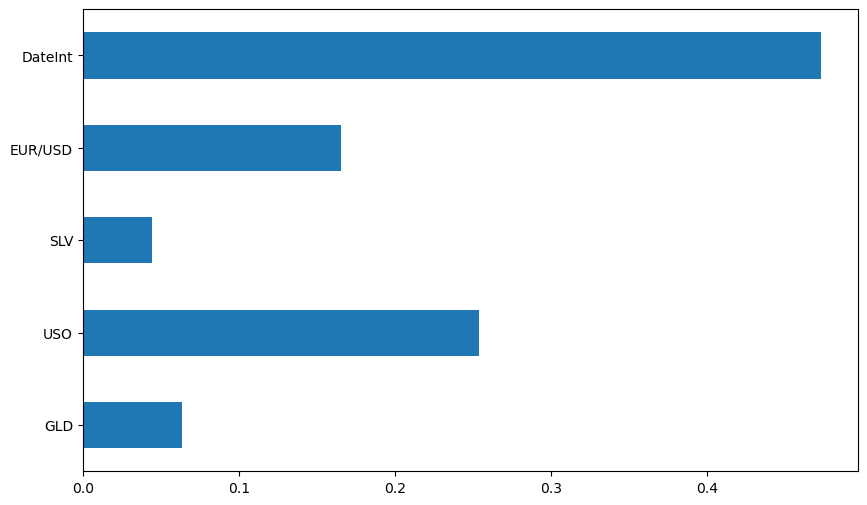

In [143]:
plt.figure(figsize=(10,6))
feature_importance.plot(kind='barh')

### PDA Plots

ValueError: All entries of features must be less than len(feature_names) = 5, got 5.

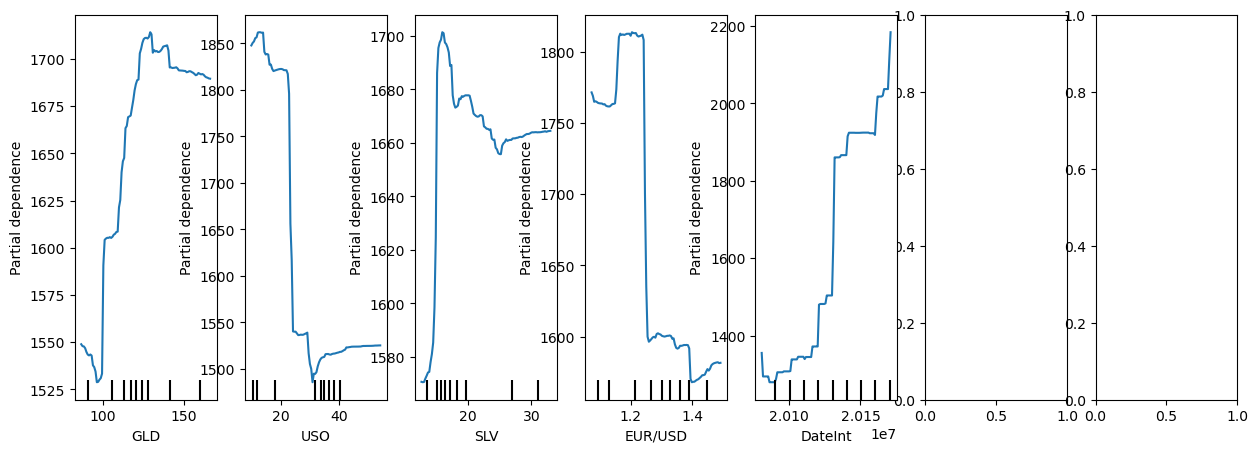

In [154]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4,5,6]

fig, ax = plt.subplots(1, len(features), figsize=(15,5))
for i,feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(model, X_train, [feature], ax= ax[i])

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Graphical User Interface

# Tkinter

In [37]:
! pip install tk

In [158]:
X_train.head()

,GLD,USO,SLV,EUR/USD,DateInt
1018,160.539993,36.220001,28.920000,1.253447,20120822.0
1870,120.900002,11.740000,16.420000,1.132824,20160622.0
118,94.440002,33.869999,18.545000,1.585590,20080716.0
220,84.519997,28.660000,11.090000,1.288494,20090120.0
2053,122.599998,11.130000,17.530001,1.061639,20170413.0


In [162]:
import tkinter as tk

In [164]:
def predict_price():
    try:
        inputs = [float(entry_GLD.get()),float(entry_USO.get()),float(entry_SLV.get()),float(entry_EUR/USD.get()),float(entry_DateInt.get())]
        prediction = rf_model.predict(inputs)
        results.set(f"Predicted Class:  {prediction[0]}")
    except ValueError:
        messagebox.showerror("Input error", "Please enter valid inputs")
        

In [172]:
def reset_entries():
    for entry in entries:
         entry.delete(0, tk.END)
    result.set("")

In [186]:
root = tk.Tk()
root.title("Gold Price Prediction")
labels = list(X_train.columns)
entries = []
for i, label in enumerate(labels):
    tk.Label(root,text=label).grid(row=i,column=0)
    entry = tk.Entry(root)
    entry.grid(row=i,column=1)
    entries.append(entry)
(entry_GLD,entry_USO,entry_SLV,entry_EURUSD,entry_DateInt) = entries
result = tk.StringVar()
tk.Label(root, textvariable=result).grid(row=13,column=0,columnspan=2)
tk.Button(root, text="Predict", command = predict_price).grid(row=14,column=0)
tk.Button(root, text="Reset", command=reset_entries).grid(row=14,column=1)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_7016\2256228028.py", line 3, in predict_price
    inputs = [float(entry_GLD.get()),float(entry_USO.get()),float(entry_SLV.get()),float(entry_EUR/USD.get()),float(entry_DateInt.get())]
                                                                                         ^^^^^^^^^
NameError: name 'entry_EUR' is not defined. Did you mean: 'entry_GLD'?
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_7016\2256228028.py", line 3, in predict_price
    inputs = [float(entry_GLD.get()),float(entry_USO.get()),float(entry_SLV.get()),float(entry